Questions which will get answered from this session
- How to calculate and interpret likelihood from decision trees
- How to mold likelihood output from machine learning models as per business use case 
- How to transform features to increase model interpretability and it's impact on likelihood

# Initial Setup

## Loading required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import pydotplus
import pickle



from sklearn.metrics import recall_score
#import psycopg2
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_colwidth',5000)
%matplotlib inline

## Reading data

In [4]:
data1 = pd.read_csv('framingham.csv')

In [5]:
data1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Exploring dataset

In [6]:
data1.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [13]:
data1.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
object_type_cols = ['male', 'education','BPMeds' ,'currentSmoker','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
for i in object_type_cols:
    data1[i] = data1[i].astype('str')

In [9]:
def my_df_describe(df):
    objects = []
    numerics = []
    for c in df:
        if (df[c].dtype == object):
            objects.append(c)
        else:
            numerics.append(c)
    print('\033[91m'+'Description for numerical columns :')
    display(df[numerics].describe())
    print('\033[91m'+'Description for non-numerical columns :')
    display(df[objects].describe())

In [10]:
my_df_describe(data1)

Description for numerical columns :


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4211.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000
mean,49.580189,9.005937,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655
std,8.572942,11.922462,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


Description for non-numerical columns :


,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4240,4240,4240,4240,4240,4240,4240,4240
unique,2,5,2,3,2,2,2,2
top,0,1.0,0,0.0,0,0,0,0
freq,2420,1720,2145,4063,4215,2923,4131,3596


In [11]:
for i in object_type_cols:
    print(i + str(sum(data1[i]=='nan')))

male0
education105
BPMeds53
currentSmoker0
prevalentStroke0
prevalentHyp0
diabetes0
TenYearCHD0


In [12]:
impute_cols = ['education','BPMeds']
for i in impute_cols:
    data1.loc[data1[i]=='nan',i] = data1[i].value_counts().index[0]

## Visualization

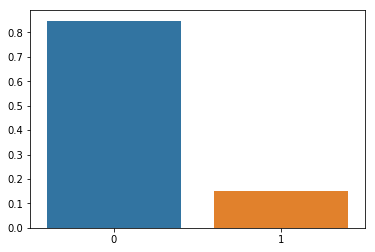

In [14]:
sns.barplot(x = data1.TenYearCHD.value_counts().index, y = data1.TenYearCHD.value_counts(normalize=True).values)

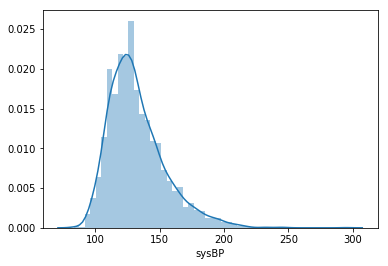

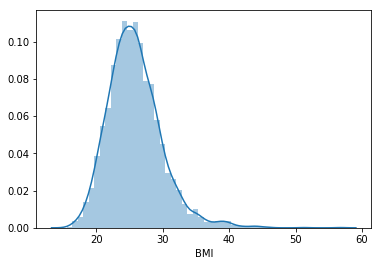

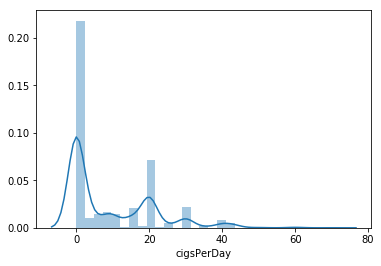

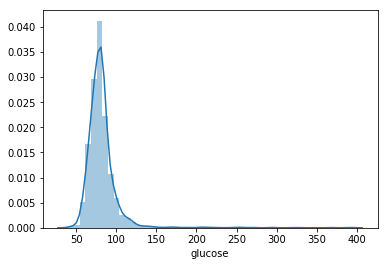

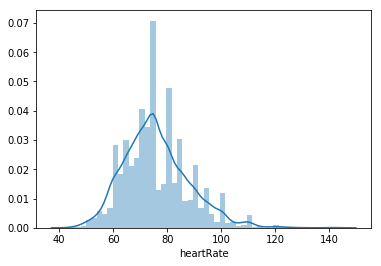

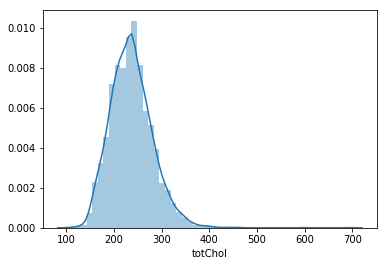

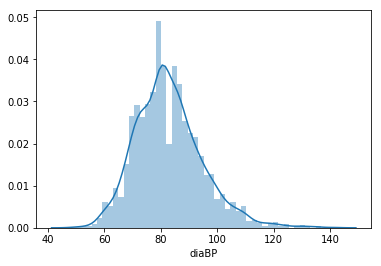

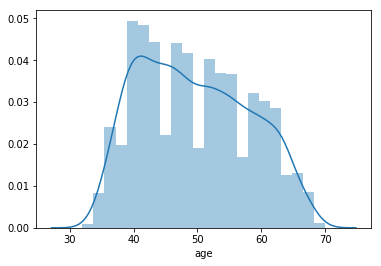

In [15]:
num_cols = list(set(data1.columns) - set(object_type_cols))
for i in num_cols:
    data1[i]=data1[i].fillna(np.mean(data1[i]))
    sns.distplot(data1[i])
    plt.show()

# Question 1 Answer

In [16]:
operate_cols = [ 'education']

data2 = data1.copy()

for i in operate_cols:
    X=pd.get_dummies(data2[i], prefix = i)
    X=X.apply(lambda x: x.astype(np.int64))
    data2 = pd.concat([data2,X],axis=1)



In [17]:

y = data2['TenYearCHD']
X = data2.drop('TenYearCHD',axis=1)



In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision tree model

In [19]:
model=DecisionTreeClassifier(max_depth=5, random_state=123,min_samples_leaf=50,min_samples_split=100)#, class_weight ='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.06      0.10       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848



## Model validation

In [21]:
confusion_matrix(y_test, y_pred),accuracy_score(y_test, y_pred)

(array([[718,   7],
        [116,   7]], dtype=int64), 0.8549528301886793)

## Calculating likelihood

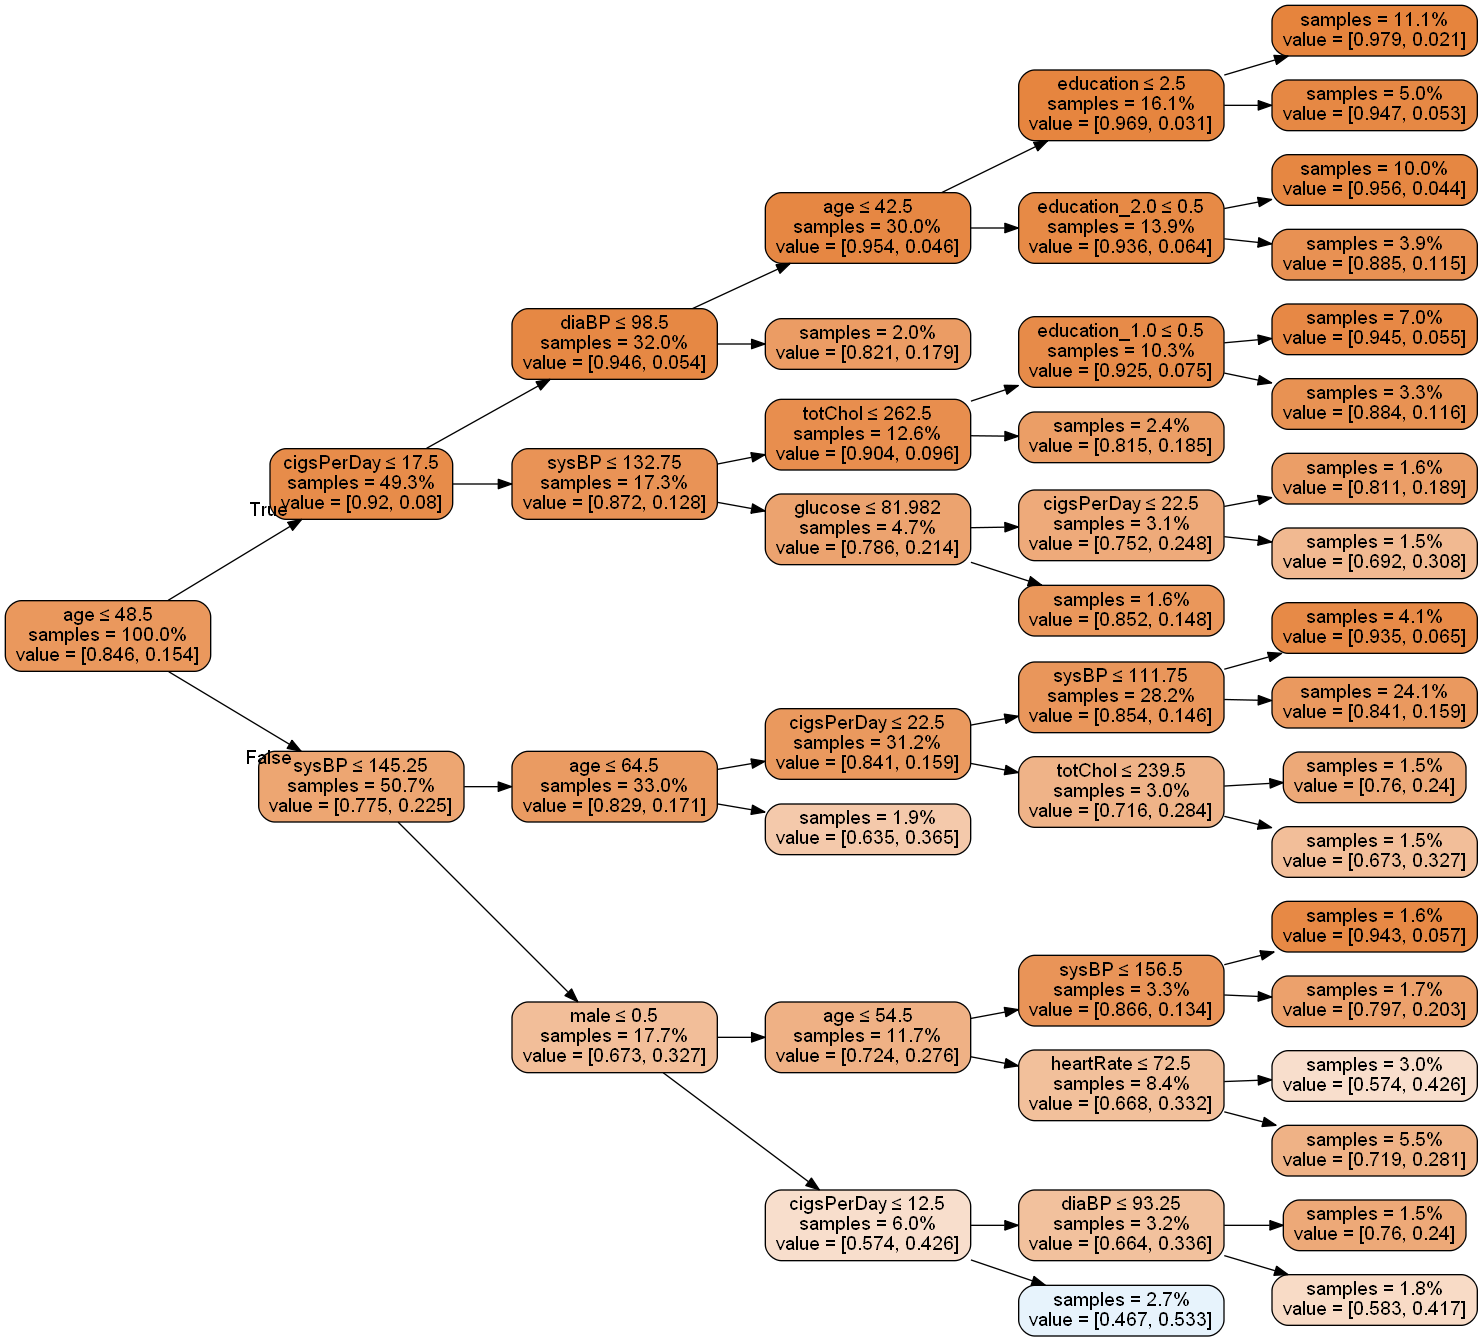

In [22]:
features=list(X.columns)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,rotate=True,
                special_characters=True,feature_names=features, impurity = False, proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    sample = tree.tree_.n_node_samples
    features  = [feature_names[i] for i in tree.tree_.feature]
    df = pd.DataFrame()
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
            sign  = '<='
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
            sign = '>'

        #lineage.append((parent, split, threshold[parent], features[parent]))
        #lineage.append(str(features[parent]) + str(sign) + str(threshold[parent]) + " and")
        lineage.append([features[parent], sign ,threshold[parent]])

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    for child in idx:
        final =[]
        for node in recurse(left, right, child):
            final.append(node)
        data=pd.DataFrame({'node_no':child,'rule':final,'likelihood_class1':value[child][0,0]/sample[child],
                          'likelihood_class2':value[child][0,1]/sample[child] , 'total_patients':sample[child]})
        df=df.append(data)
    #dump_df_s3(df) 
    return(df)
    print(df)    

In [24]:
df_rules=get_lineage(model,features) #Extracting rules from the first tree
df_rules = df_rules[df_rules.rule!=df_rules.node_no.astype('int64')]

In [25]:
df_rules.head(10)

,node_no,rule,likelihood_class1,likelihood_class2,sample,total_patients
0,5,"[age, <=, 48.5]",0.978723,0.021277,376.0,376
1,5,"[cigsPerDay, <=, 17.5]",0.978723,0.021277,376.0,376
2,5,"[diaBP, <=, 98.5]",0.978723,0.021277,376.0,376
3,5,"[age, <=, 42.5]",0.978723,0.021277,376.0,376
4,5,"[education, <=, 2.5]",0.978723,0.021277,376.0,376
0,6,"[age, <=, 48.5]",0.947368,0.052632,171.0,171
1,6,"[cigsPerDay, <=, 17.5]",0.947368,0.052632,171.0,171
2,6,"[diaBP, <=, 98.5]",0.947368,0.052632,171.0,171
3,6,"[age, <=, 42.5]",0.947368,0.052632,171.0,171
4,6,"[education, >, 2.5]",0.947368,0.052632,171.0,171


In [26]:
df_rules.likelihood_class2.unique()

array([0.0212766 , 0.05263158, 0.04424779, 0.11450382, 0.17910448,
       0.05508475, 0.11607143, 0.18518519, 0.18867925, 0.30769231,
       0.14814815, 0.0647482 , 0.15931373, 0.24      , 0.32692308,
       0.36507937, 0.05660377, 0.20338983, 0.42574257, 0.28108108,
       0.41666667, 0.5326087 ])

# Question 2 Answer

In [27]:
final_df = pd.DataFrame() 
final_df = pd.DataFrame({'node_no':df_rules.groupby('node_no')['rule'].apply(list).index,
                         'rule' : df_rules.groupby('node_no')['rule'].apply(list).values,
                         'disease_prob': df_rules.groupby('node_no')['likelihood_class2'].mean().values,
                        'node_pats' : df_rules.groupby('node_no')['total_patients'].mean().values})
final_df['pats_leak'] = final_df.disease_prob* final_df.node_pats
final_df = final_df.sort_values('disease_prob',ascending=False).reset_index(drop=True)

In [28]:
final_df.head(10)

,node_no,rule,disease_prob,node_pats,pats_leak
0,44,"[[age, >, 48.5], [sysBP, >, 145.25], [male, >, 0.5], [cigsPerDay, >, 12.5]]",0.532609,92,49.0
1,38,"[[age, >, 48.5], [sysBP, >, 145.25], [male, <=, 0.5], [age, >, 54.5], [heartRate, <=, 72.5]]",0.425743,101,43.0
2,43,"[[age, >, 48.5], [sysBP, >, 145.25], [male, >, 0.5], [cigsPerDay, <=, 12.5], [diaBP, >, 93.25]]",0.416667,60,25.0
3,31,"[[age, >, 48.5], [sysBP, <=, 145.25], [age, >, 64.5]]",0.365079,63,23.0
4,30,"[[age, >, 48.5], [sysBP, <=, 145.25], [age, <=, 64.5], [cigsPerDay, >, 22.5], [totChol, >, 239.5]]",0.326923,52,17.0
5,20,"[[age, <=, 48.5], [cigsPerDay, >, 17.5], [sysBP, >, 132.75], [glucose, <=, 81.98182678222656], [cigsPerDay, >, 22.5]]",0.307692,52,16.0
6,39,"[[age, >, 48.5], [sysBP, >, 145.25], [male, <=, 0.5], [age, >, 54.5], [heartRate, >, 72.5]]",0.281081,185,52.0
7,42,"[[age, >, 48.5], [sysBP, >, 145.25], [male, >, 0.5], [cigsPerDay, <=, 12.5], [diaBP, <=, 93.25]]",0.240000,50,12.0
8,29,"[[age, >, 48.5], [sysBP, <=, 145.25], [age, <=, 64.5], [cigsPerDay, >, 22.5], [totChol, <=, 239.5]]",0.240000,50,12.0
9,36,"[[age, >, 48.5], [sysBP, >, 145.25], [male, <=, 0.5], [age, <=, 54.5], [sysBP, >, 156.5]]",0.203390,59,12.0


## Undersampling

In [29]:

# sampler = TomekLinks(ratio='majority')
# X_us, y_us = sampler.fit_sample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=42)


# cc = ClusterCentroids(ratio={0: 100})
# X_cc, y_cc = cc.fit_sample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.3, random_state=42)

rs = RandomUnderSampler(sampling_strategy=1.0 ,random_state = 1000)
X_rs, y_rs = rs.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)



## Decision tree model

In [30]:
model=DecisionTreeClassifier(max_depth=5, random_state=123,min_samples_leaf=50,min_samples_split=100)#, class_weight ='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [31]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57       139
           1       0.57      0.82      0.67       119

    accuracy                           0.63       258
   macro avg       0.66      0.64      0.62       258
weighted avg       0.67      0.63      0.62       258



## Model validation

In [32]:
confusion_matrix(y_test, y_pred),accuracy_score(y_test, y_pred)

(array([[64, 75],
        [21, 98]], dtype=int64), 0.627906976744186)

## Calculating likelihood

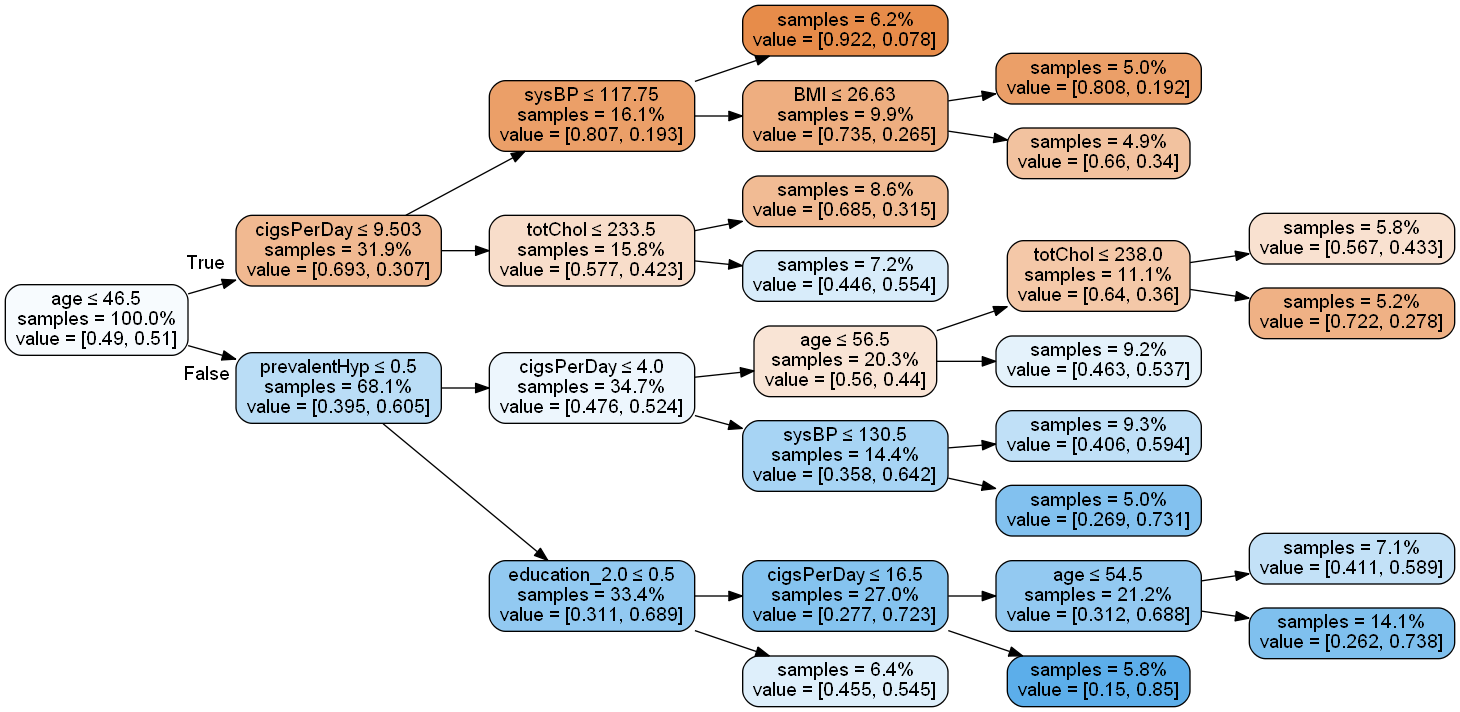

In [33]:
features=list(X.columns)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,rotate=True,
                special_characters=True,feature_names=features, impurity = False, proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    sample = tree.tree_.n_node_samples
    features  = [feature_names[i] for i in tree.tree_.feature]
    df = pd.DataFrame()
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
            sign  = '<='
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
            sign = '>'

        #lineage.append((parent, split, threshold[parent], features[parent]))
        #lineage.append(str(features[parent]) + str(sign) + str(threshold[parent]) + " and")
        lineage.append([features[parent], sign ,threshold[parent]])

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    for child in idx:
        final =[]
        for node in recurse(left, right, child):
            final.append(node)
        data=pd.DataFrame({'node_no':child,'rule':final,'likelihood_class1':value[child][0,0]/sample[child],
                          'likelihood_class2':value[child][0,1]/sample[child],  'total_patients':sample[child]})
        df=df.append(data)
    #dump_df_s3(df) 
    return(df)
    print(df)    

In [35]:
df_rules=get_lineage(model,features) #Extracting rules from the first tree
df_rules = df_rules[df_rules.rule!=df_rules.node_no.astype('int64')]

In [36]:
final_df = pd.DataFrame() 
final_df = pd.DataFrame({'node_no':df_rules.groupby('node_no')['rule'].apply(list).index,
                         'rule' : df_rules.groupby('node_no')['rule'].apply(list).values,
                         'disease_prob': df_rules.groupby('node_no')['likelihood_class2'].mean().values,
                        'node_pats' : df_rules.groupby('node_no')['total_patients'].mean().values})
final_df['pats_leak'] = final_df.disease_prob* final_df.node_pats
final_df = final_df.sort_values('disease_prob',ascending=False).reset_index(drop=True)

In [37]:
final_df.head(10)

,node_no,rule,disease_prob,node_pats,pats_leak
0,25,"[[age, >, 46.5], [prevalentHyp, >, 0.5], [education_2.0, <=, 0.5], [cigsPerDay, >, 16.5]]",0.850000,60,51.0
1,24,"[[age, >, 46.5], [prevalentHyp, >, 0.5], [education_2.0, <=, 0.5], [cigsPerDay, <=, 16.5], [age, >, 54.5]]",0.737931,145,107.0
2,19,"[[age, >, 46.5], [prevalentHyp, <=, 0.5], [cigsPerDay, >, 4.0], [sysBP, >, 130.5]]",0.730769,52,38.0
3,18,"[[age, >, 46.5], [prevalentHyp, <=, 0.5], [cigsPerDay, >, 4.0], [sysBP, <=, 130.5]]",0.593750,96,57.0
4,23,"[[age, >, 46.5], [prevalentHyp, >, 0.5], [education_2.0, <=, 0.5], [cigsPerDay, <=, 16.5], [age, <=, 54.5]]",0.589041,73,43.0
5,9,"[[age, <=, 46.5], [cigsPerDay, >, 9.502968311309814], [totChol, >, 233.5]]",0.554054,74,41.0
6,26,"[[age, >, 46.5], [prevalentHyp, >, 0.5], [education_2.0, >, 0.5]]",0.545455,66,36.0
7,16,"[[age, >, 46.5], [prevalentHyp, <=, 0.5], [cigsPerDay, <=, 4.0], [age, >, 56.5]]",0.536842,95,51.0
8,14,"[[age, >, 46.5], [prevalentHyp, <=, 0.5], [cigsPerDay, <=, 4.0], [age, <=, 56.5], [totChol, <=, 238.0]]",0.433333,60,26.0
9,6,"[[age, <=, 46.5], [cigsPerDay, <=, 9.502968311309814], [sysBP, >, 117.75], [BMI, >, 26.630000114440918]]",0.340000,50,17.0


In this above table, likelihood of each cohort has increased

# Question 3 Answer

## Model input data prep

In [41]:
data1['glucose_disc'] = pd.cut(data1['glucose'],[0,80,max(data1['glucose'])],labels=['[0-80]','(80+]'],duplicates='drop',include_lowest=True)
data1['glucose_disc'].cat.reorder_categories(['[0-80]','(80+]'], inplace=True)


data1['age_disc'] = pd.cut(data1['age'],[0,50,max(data1['age'])],labels=['[0-50]','(50+]'],duplicates='drop',include_lowest=True)
data1['age_disc'].cat.reorder_categories(['[0-50]','(50+]'], inplace=True)


data1['totChol_disc'] = pd.cut(data1['totChol'],[0,250,max(data1['totChol'])],labels=['[0-250]','(250+]'],duplicates='drop',include_lowest=True)
data1['totChol_disc'].cat.reorder_categories(['[0-250]','(250+]'], inplace=True)


data1['heartRate_disc'] = pd.cut(data1['heartRate'],[0,80,max(data1['heartRate'])],labels=['[0-80]','(80+]'],duplicates='drop',include_lowest=True)
data1['heartRate_disc'].cat.reorder_categories(['[0-80]','(80+]'], inplace=True)



data1['BMI_disc'] = pd.cut(data1['BMI'],[0,28,max(data1['BMI'])],labels=['[0-28]','(28+]'],duplicates='drop',include_lowest=True)
data1['BMI_disc'].cat.reorder_categories(['[0-28]','(28+]'], inplace=True)


data1['diaBP_disc'] = pd.cut(data1['diaBP'],[0,90,max(data1['diaBP'])],labels=['[0-90]','(90+]'],duplicates='drop',include_lowest=True)
data1['diaBP_disc'].cat.reorder_categories(['[0-90]','(90+]'], inplace=True)


data1['cigsPerDay_disc'] = pd.cut(data1['cigsPerDay'],[0,20,max(data1['cigsPerDay'])],labels=['[0-20]','(20+]'],duplicates='drop',include_lowest=True)
data1['cigsPerDay_disc'].cat.reorder_categories(['[0-20]','(20+]'], inplace=True)



data1['sysBP_disc'] = pd.cut(data1['sysBP'],[0,140,max(data1['sysBP'])],labels=['[0-140]','(140+]'],duplicates='drop',include_lowest=True)
data1['sysBP_disc'].cat.reorder_categories(['[0-140]','(140+]'], inplace=True)

In [42]:
operate_cols = ['glucose_disc','age_disc','totChol_disc','heartRate_disc','BMI_disc','diaBP_disc','cigsPerDay_disc','sysBP_disc']

for i in operate_cols:
    X=pd.get_dummies(data1[i], prefix = i)
    X=X.apply(lambda x: x.astype(np.int64))
    data1 = pd.concat([data1,X],axis=1)



In [43]:
x_vars = ['male', 'education', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'glucose_disc_[0-80]',
       'glucose_disc_(80+]', 'age_disc_[0-50]', 'age_disc_(50+]',
       'totChol_disc_[0-250]', 'totChol_disc_(250+]', 'heartRate_disc_[0-80]',
       'heartRate_disc_(80+]', 'BMI_disc_[0-28]', 'BMI_disc_(28+]',
       'diaBP_disc_[0-90]', 'diaBP_disc_(90+]', 'cigsPerDay_disc_[0-20]',
       'cigsPerDay_disc_(20+]', 'sysBP_disc_[0-140]', 'sysBP_disc_(140+]']

y = data1['TenYearCHD']
X = data1[x_vars]



In [63]:
rs = RandomUnderSampler(sampling_strategy=1.0 ,random_state = 1000)
X_rs, y_rs = rs.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)


## Decision tree model

In [64]:
model=DecisionTreeClassifier(max_depth=5, random_state=123,min_samples_leaf=50,min_samples_split=100)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [65]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       139
           1       0.58      0.63      0.60       119

    accuracy                           0.62       258
   macro avg       0.62      0.62      0.62       258
weighted avg       0.62      0.62      0.62       258



## Model validation

In [66]:
confusion_matrix(y_test, y_pred),accuracy_score(y_test, y_pred)

(array([[85, 54],
        [44, 75]], dtype=int64), 0.6201550387596899)

## Calculating likelihood

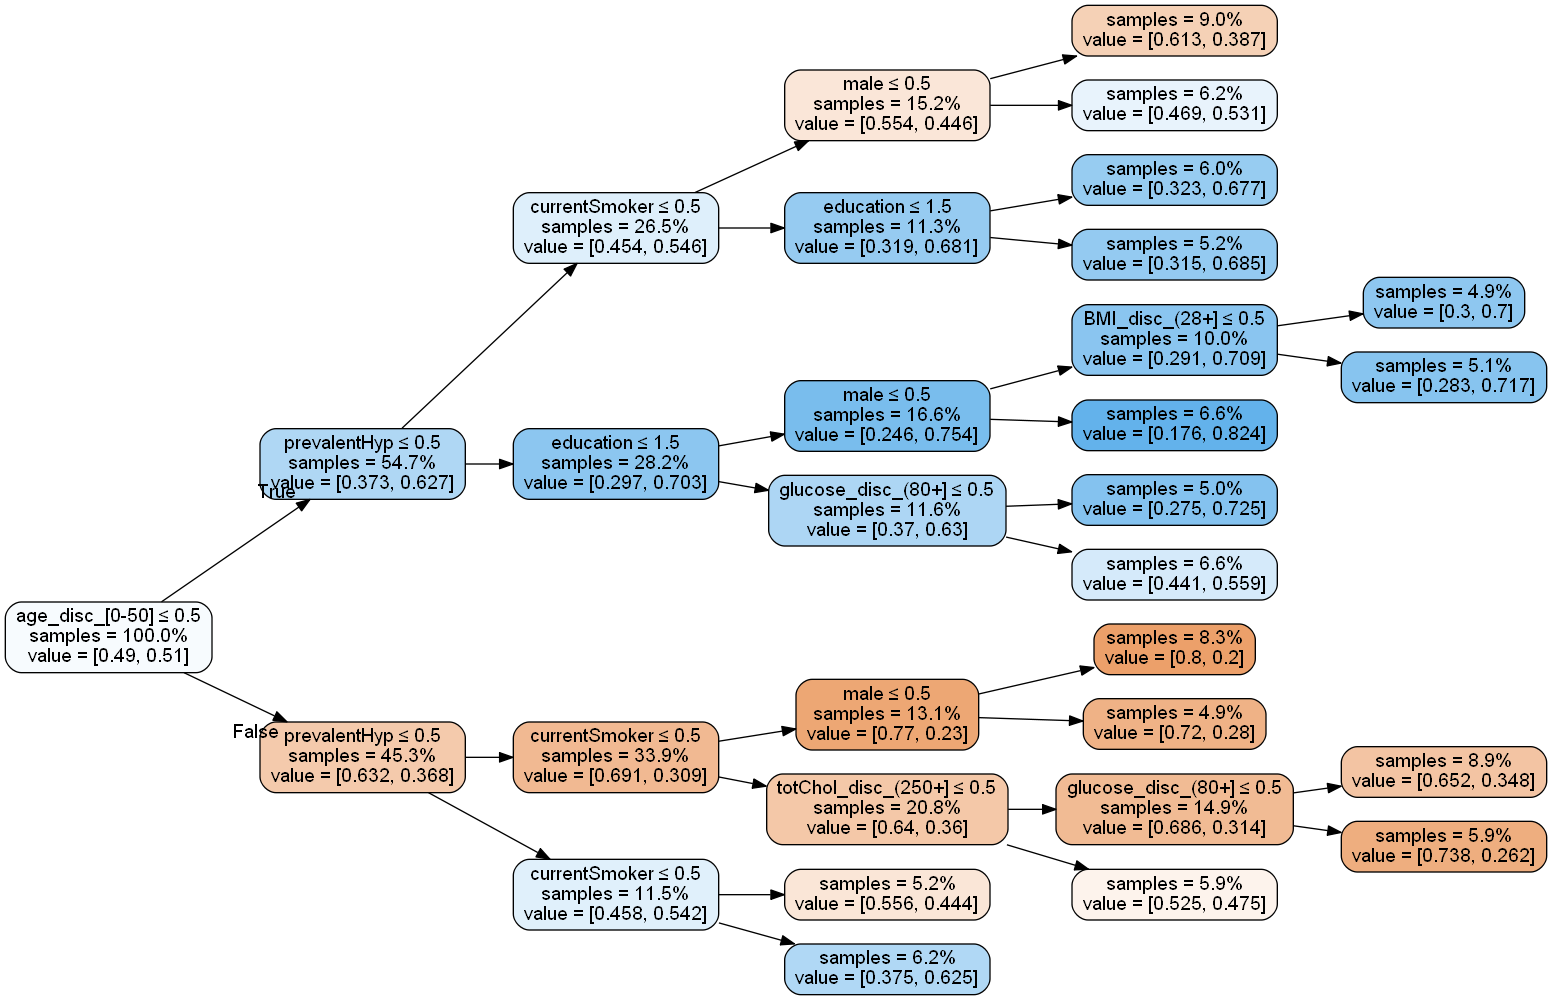

In [67]:
features=list(X.columns)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,rotate=True,
                special_characters=True,feature_names=features, impurity = False, proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [68]:
def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    sample = tree.tree_.n_node_samples
    features  = [feature_names[i] for i in tree.tree_.feature]
    df = pd.DataFrame()
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
            sign  = '<='
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
            sign = '>'

        #lineage.append((parent, split, threshold[parent], features[parent]))
        #lineage.append(str(features[parent]) + str(sign) + str(threshold[parent]) + " and")
        lineage.append([features[parent], sign ,threshold[parent]])

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    for child in idx:
        final =[]
        for node in recurse(left, right, child):
            final.append(node)
        data=pd.DataFrame({'node_no':child,'rule':final,'likelihood_endo_class1':value[child][0,0]/sample[child],
                          'likelihood_class2':value[child][0,1]/sample[child], 'total_patients':sample[child]})
        df=df.append(data)
    #dump_df_s3(df) 
    return(df)
    print(df)    

In [69]:
df_rules=get_lineage(model,features) #Extracting rules from the first tree
df_rules = df_rules[df_rules.rule!=df_rules.node_no.astype('int64')]

In [70]:
final_df = pd.DataFrame() 
final_df = pd.DataFrame({'node_no':df_rules.groupby('node_no')['rule'].apply(list).index,
                         'rule' : df_rules.groupby('node_no')['rule'].apply(list).values,
                         'disease_prob': df_rules.groupby('node_no')['likelihood_class2'].mean().values,
                        'node_pats' : df_rules.groupby('node_no')['total_patients'].mean().values})
final_df['pats_leak'] = final_df.disease_prob* final_df.node_pats
final_df = final_df.sort_values('disease_prob',ascending=False).reset_index(drop=True)

In [71]:
new_df = pd.DataFrame()
new_df['node_no'] = model.apply(X.values.astype('float32'), check_input=True)
new_df['total_pats'] = 1
new_df['actual_disease'] = y.values

In [72]:
actual_node_df = new_df.groupby(['node_no'])['total_pats','actual_disease'].sum().reset_index()
final_df = final_df.merge(actual_node_df, on = 'node_no', how='left')

In [73]:
final_df.head(10)

,node_no,rule,disease_prob,node_pats,pats_leak,total_pats
0,14,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, >, 0.5], [education, <=, 1.5], [male, >, 0.5]]",0.823529,68,56.0,194
1,16,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, >, 0.5], [education, >, 1.5], [glucose_disc_(80+], <=, 0.5]]",0.725490,51,37.0,160
2,13,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, >, 0.5], [education, <=, 1.5], [male, <=, 0.5], [BMI_disc_(28+], >, 0.5]]",0.716981,53,38.0,139
3,12,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, >, 0.5], [education, <=, 1.5], [male, <=, 0.5], [BMI_disc_(28+], <=, 0.5]]",0.700000,50,35.0,148
4,8,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, <=, 0.5], [currentSmoker, >, 0.5], [education, >, 1.5]]",0.685185,54,37.0,210
5,7,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, <=, 0.5], [currentSmoker, >, 0.5], [education, <=, 1.5]]",0.677419,62,42.0,217
6,30,"[[age_disc_[0-50], >, 0.5], [prevalentHyp, >, 0.5], [currentSmoker, >, 0.5]]",0.625000,64,40.0,265
7,17,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, >, 0.5], [education, >, 1.5], [glucose_disc_(80+], >, 0.5]]",0.558824,68,38.0,201
8,5,"[[age_disc_[0-50], <=, 0.5], [prevalentHyp, <=, 0.5], [currentSmoker, <=, 0.5], [male, >, 0.5]]",0.531250,64,34.0,229
9,27,"[[age_disc_[0-50], >, 0.5], [prevalentHyp, <=, 0.5], [currentSmoker, >, 0.5], [totChol_disc_(250+], >, 0.5]]",0.475410,61,29.0,275
